# Курсовая работа. Блок ML Beginner
<br>

**NB!** Код должен быть с комментариями к каждому логическому блоку кода. В противном случае работа **не** будет принята. <br><br>
Выполнение курсовой работы может потребовать использование дополнительных библиотек. Может потребоваться предварительная обработка данных.

<br><br>
**Описание работы:**
&nbsp;&nbsp;&nbsp;&nbsp;
<br><br>
&nbsp;&nbsp;&nbsp;&nbsp; Любой бизнес хочет максимизировать количество клиентов. Для достижения этой цели важно не только пытаться привлечь новых, но и удерживать уже существующих. Удержать клиента обойдется компании дешевле, чем привлечь нового. Кроме того, новый клиент может оказаться слабо заинтересованным в услугах бизнеса и с ним будет сложно работать, тогда как о старых клиентах уже есть необходимые данные по взаимодействию с сервисом.
 <br>

&nbsp;&nbsp;&nbsp;&nbsp; Соответственно, прогнозируя отток, мы можем вовремя среагировать и попытаться удержать клиента, который хочет уйти. Опираясь на данные об услугах, которыми пользуется клиент, мы можем сделать ему специальное предложение, пытаясь изменить его решение об уходе от оператора. Благодаря этому задача удержания будет легче в реализации, чем задача привлечения новых пользователей, о которых мы еще ничего не знаем.<br>

&nbsp;&nbsp;&nbsp;&nbsp; Вам предоставлен набор данных от телекоммуникационной компании. В данных содержится информация о почти шести тысячах пользователей, их демографических характеристиках, услугах, которыми они пользуются, длительности пользования услугами оператора, методе оплаты, размере оплаты.
<br>

&nbsp;&nbsp;&nbsp;&nbsp; Cтоит задача проанализировать данные и спрогнозировать отток пользователей (выявить людей, которые продлят контракт и которые не продлят). Работа должна включать в себя следующие обязательные пункты:
1. Описание данных *(с расчетом базовых статистик)*,
2. Исследование зависимостей и формулирование гипотез,
3. Построение моделей для прогнозирования оттока *(с обоснованием выбора той или иной модели)* на основе проверенных гипотез и выявленных взаимосвязей,
4. Сравнение качества полученных моделей.

Во втором разделе обязательно должно присутствовать обоснование гипотез, подробное описание выявленных взаимосвязей, а также их визуализация.
<br>В четвертом дополнительно должны быть сформулированы общие выводы работы.

<br><br>

_________

[Codebook](#Codebook) <br>
[1. Описание данных](#1.-Описание-данных)<br>
[2. Исследование зависимостей и формулирование гипотез](#2.-Исследование-зависимостей-и-формулирование-гипотез)<br>
[3. Построение моделей для прогнозирования оттока](#3.-Построение-моделей-для-прогнозирования-оттока)<br>
[4. Сравнение качества моделей](#4.-Сравнение-качества-моделей) <br>


## Codebook
<br>

[Ссылка для скачивания данных](https://drive.google.com/open?id=1dPCG76ST6NohYKtVMGv6HpFL-jD5p1eJ)
<br><br>

`telecom_users.csv` содержит следующие значения:<br><br>

&nbsp;&nbsp;&nbsp;&nbsp; `customerID` – id клиента<br>
&nbsp;&nbsp;&nbsp;&nbsp; `gender` – пол клиента (male/female)<br>
&nbsp;&nbsp;&nbsp;&nbsp; `SeniorCitizen` – яляется ли клиент пенсионером (1, 0)<br>
&nbsp;&nbsp;&nbsp;&nbsp; `Partner` – состоит ли клиент в браке (Yes, No)<br>
&nbsp;&nbsp;&nbsp;&nbsp; `Dependents` – есть ли у клиента иждивенцы (Yes, No)<br>
&nbsp;&nbsp;&nbsp;&nbsp; `tenure` – сколько месяцев человек являлся клиентом компании<br>
&nbsp;&nbsp;&nbsp;&nbsp; `PhoneService` – подключена ли услуга телефонной связи (Yes, No)<br>
&nbsp;&nbsp;&nbsp;&nbsp; `MultipleLines` – подключены ли несколько телефонных линий (Yes, No, No phone service)<br>
&nbsp;&nbsp;&nbsp;&nbsp; `InternetService` – интернет-провайдер клиента (DSL, Fiber optic, No)<br>
&nbsp;&nbsp;&nbsp;&nbsp; `OnlineSecurity` – подключена ли услуга онлайн-безопасности (Yes, No, No internet service)<br>
&nbsp;&nbsp;&nbsp;&nbsp; `OnlineBackup` – подключена ли услуга online backup (Yes, No, No internet service)<br>
&nbsp;&nbsp;&nbsp;&nbsp; `DeviceProtection` – есть ли у клиента страховка оборудования (Yes, No, No internet service)<br>
&nbsp;&nbsp;&nbsp;&nbsp; `TechSupport` – подключена ли услуга технической поддержки (Yes, No, No internet service)<br>
&nbsp;&nbsp;&nbsp;&nbsp; `StreamingTV` – подключена ли услуга стримингового телевидения (Yes, No, No internet service)<br>
&nbsp;&nbsp;&nbsp;&nbsp; `StreamingMovies` – подключена ли услуга стримингового кинотеатра (Yes, No, No internet service)<br>
&nbsp;&nbsp;&nbsp;&nbsp; `Contract` – тип контракта клиента (Month-to-month, One year, Two year)<br>
&nbsp;&nbsp;&nbsp;&nbsp; `PaperlessBilling` – пользуется ли клиент безбумажным биллингом (Yes, No)<br>
&nbsp;&nbsp;&nbsp;&nbsp; `PaymentMethod` – метод оплаты (Electronic check, Mailed check, Bank transfer (automatic), Credit card (automatic))<br>
&nbsp;&nbsp;&nbsp;&nbsp; `MonthlyCharges` – месячный размер оплаты на настоящий момент<br>
&nbsp;&nbsp;&nbsp;&nbsp; `TotalCharges` – общая сумма, которую клиент заплатил за услуги за все время<br>
&nbsp;&nbsp;&nbsp;&nbsp; `Churn` – произошел ли отток (Yes or No)<br>

# 1. Описание данных

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split, GridSearchCV, StratifiedKFold

from sklearn.ensemble import GradientBoostingClassifier, RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression

from sklearn.metrics import precision_score, recall_score, accuracy_score, f1_score
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import roc_auc_score, roc_curve, auc, precision_recall_curve

from sklearn.preprocessing import MinMaxScaler

import xgboost as xgb

import warnings
warnings.filterwarnings('ignore')

%matplotlib inline

# Загрузим csv файл
data_frame = pd.read_csv('telecom_users.csv', index_col=0)

# Выведем для просмотра первые 10 строк датафрейма
data_frame.head(10)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
1869,7010-BRBUU,Male,0,Yes,Yes,72,Yes,Yes,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Credit card (automatic),24.10,1734.65,No
4528,9688-YGXVR,Female,0,No,No,44,Yes,No,Fiber optic,No,...,Yes,No,Yes,No,Month-to-month,Yes,Credit card (automatic),88.15,3973.2,No
6344,9286-DOJGF,Female,1,Yes,No,38,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Bank transfer (automatic),74.95,2869.85,Yes
6739,6994-KERXL,Male,0,No,No,4,Yes,No,DSL,No,...,No,No,No,Yes,Month-to-month,Yes,Electronic check,55.90,238.5,No
432,2181-UAESM,Male,0,No,No,2,Yes,No,DSL,Yes,...,Yes,No,No,No,Month-to-month,No,Electronic check,53.45,119.5,No
2215,4312-GVYNH,Female,0,Yes,No,70,No,No phone service,DSL,Yes,...,Yes,Yes,No,Yes,Two year,Yes,Bank transfer (automatic),49.85,3370.2,No
5260,2495-KZNFB,Female,0,No,No,33,Yes,Yes,Fiber optic,Yes,...,No,No,No,Yes,Month-to-month,Yes,Electronic check,90.65,2989.6,No
6001,4367-NHWMM,Female,0,No,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,24.90,24.9,No
1480,8898-KASCD,Male,0,No,No,39,No,No phone service,DSL,No,...,Yes,Yes,No,No,One year,No,Mailed check,35.55,1309.15,No
5137,8016-NCFVO,Male,1,No,No,55,Yes,Yes,Fiber optic,Yes,...,Yes,Yes,Yes,Yes,Month-to-month,Yes,Electronic check,116.50,6382.55,No


In [2]:
# Рассмотрим общую информацию о датафрейме, 
# посмотрим какие форматы данных содержатся в нем и кол-во пропущенных значений

data_frame.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5986 entries, 1869 to 860
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        5986 non-null   object 
 1   gender            5986 non-null   object 
 2   SeniorCitizen     5986 non-null   int64  
 3   Partner           5986 non-null   object 
 4   Dependents        5986 non-null   object 
 5   tenure            5986 non-null   int64  
 6   PhoneService      5986 non-null   object 
 7   MultipleLines     5986 non-null   object 
 8   InternetService   5986 non-null   object 
 9   OnlineSecurity    5986 non-null   object 
 10  OnlineBackup      5986 non-null   object 
 11  DeviceProtection  5986 non-null   object 
 12  TechSupport       5986 non-null   object 
 13  StreamingTV       5986 non-null   object 
 14  StreamingMovies   5986 non-null   object 
 15  Contract          5986 non-null   object 
 16  PaperlessBilling  5986 non-null   object

In [3]:
# Из общей информации можно заметить ошибочное определение типа данных в столбце TotalCharges.
# Скорее всего это связанно с тем, что клиент пользуется услугами впервые и не проводил оплату.
# Выведем только тех клиентов которые пользуются услугами впервые.

data_frame[data_frame['tenure'] == 0][['customerID', 'tenure', 'TotalCharges']]

,customerID,tenure,TotalCharges
6754,2775-SEFEE,0,
1340,1371-DWPAZ,0,
3826,3213-VVOLG,0,
5218,2923-ARZLG,0,
3331,7644-OMVMY,0,
936,5709-LVOEQ,0,
753,3115-CZMZD,0,
4380,2520-SGTTA,0,
488,4472-LVYGI,0,
1082,4367-NUYAO,0,


In [4]:
# Заменим пропущенные значения на 0 и преобразуем данные к типу float64
data_frame['TotalCharges'] = data_frame['TotalCharges'].apply(lambda x: 0 if x == ' ' else x)
data_frame['TotalCharges'] = data_frame['TotalCharges'].astype('float64')
data_frame.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5986 entries, 1869 to 860
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        5986 non-null   object 
 1   gender            5986 non-null   object 
 2   SeniorCitizen     5986 non-null   int64  
 3   Partner           5986 non-null   object 
 4   Dependents        5986 non-null   object 
 5   tenure            5986 non-null   int64  
 6   PhoneService      5986 non-null   object 
 7   MultipleLines     5986 non-null   object 
 8   InternetService   5986 non-null   object 
 9   OnlineSecurity    5986 non-null   object 
 10  OnlineBackup      5986 non-null   object 
 11  DeviceProtection  5986 non-null   object 
 12  TechSupport       5986 non-null   object 
 13  StreamingTV       5986 non-null   object 
 14  StreamingMovies   5986 non-null   object 
 15  Contract          5986 non-null   object 
 16  PaperlessBilling  5986 non-null   object

In [5]:
# Посмотри на предварительные статестические показатели по столбца
# которые содержат строковые данные
data_frame.describe(include=np.object_)

,customerID,gender,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Churn
count,5986,5986,5986,5986,5986,5986,5986,5986,5986,5986,5986,5986,5986,5986,5986,5986,5986
unique,5986,2,2,2,2,3,3,3,3,3,3,3,3,3,2,4,2
top,7010-BRBUU,Male,No,No,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,No
freq,1,3050,3082,4195,5396,2848,2627,2982,2605,2640,2960,2389,2356,3269,3528,2006,4399


In [6]:
# Посмотри на предварительные статестические показатели по столбца
# которые содержат числовые
data_frame.describe(include=np.number)

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
count,5986.000000,5986.000000,5986.000000,5986.000000
mean,0.161377,32.468760,64.802213,2294.221559
std,0.367909,24.516391,30.114702,2274.164124
min,0.000000,0.000000,18.250000,0.000000
25%,0.000000,9.000000,35.650000,401.587500
50%,0.000000,29.000000,70.400000,1408.575000
75%,0.000000,56.000000,89.900000,3841.500000
max,1.000000,72.000000,118.750000,8684.800000


Данные имеют 5986 записей (клиентов) и 21 столбец. Каждая строка представляет отдельного клиента, а каждый столбец представляет различные атрибуты клиента и информацию о его услугах.

Типы данных включают float64 (для столбца MonthlyCharges и TotalCharges), int64 (для столбцов SeniorCitizen и tenure) и object (для остальных столбцов, которые являются строками).

На основе предоставленной первичной статистической информации можно сделать следующие выводы:

1. SeniorCitizen: Приблизительно 16% клиентов являются пенсионерами.

2. tenure: Средняя длительность клиентского стажа составляет около 32 месяцев. Минимальное значение равно 0, а максимальное - 72 месяцам. 25% клиентов имеют стаж менее 9 месяцев, а 75% клиентов имеют стаж менее 56 месяцев.

3. MonthlyCharges: Средний ежемесячный платеж клиентов составляет около 65 единиц. Минимальная месячная плата составляет 18.25, а максимальная - 118.75. 50% клиентов имеют ежемесячные платежи в диапазоне от 35.65 до 89.9.

4. TotalCharges: Средняя общая сумма платежей клиентов за все время составляет около 2294. Минимальная общая сумма составляет 0, а максимальная - 8684.8. 50% клиентов имеют общие суммы платежей в диапазоне от 401.58 до 3841.5.

5. gender: Самое часто встречающееся значение - Male (3050), что означает, что среди клиентов преобладают мужчины.

6. Partner: Самое часто встречающееся значение - No (3082), что означает, что большинство клиентов не состоит в браке.

7. Dependents: Самое часто встречающееся значение - No (4195), что означает, что большинство клиентов не имеют иждивенцев.

8. PhoneService: Большинство клиентов (5396) подключены к услуге телефонной связи.

9. MultipleLines: Большинство клиентов (2848) не подключены к нескольким телефонным линиям.

10. InternetService: Самым частым значением является Fiber optic (2627), что означает, что большинство клиентов используют оптоволоконный интернет.

11. OnlineSecurity, OnlineBackup, DeviceProtection, TechSupport, StreamingTV, StreamingMovies: Большинство клиентов не подключены к услугам онлайн-безопасности, онлайн-резервного копирования, страховки оборудования, технической поддержки, стримингового телевидения и стримингового кинотеатра.

12. Contract: Большинство клиентов имеют месячный контракт (3269).

13. PaperlessBilling: Большинство клиентов (3528) используют безбумажный биллинг.

14. PaymentMethod: Самым часто используемым методом оплаты является Electronic check (2006).

15. Churn: Большинство клиентов (4399) не покинули компанию.

# 2. Исследование зависимостей и формулирование гипотез

2.1 Иследование зависимостей

2.1.1 Иследование целевого класса Churn

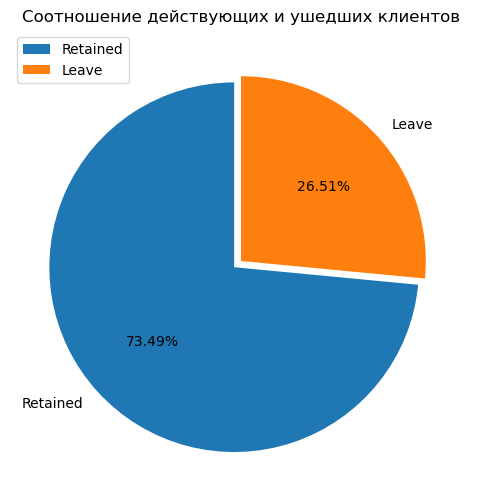

In [7]:
# Зададим размер фигуры
plt.figure(figsize=(8, 6))

# Оформление круговой диаграммы
plt.pie(data_frame['Churn'].value_counts(), labels=['Retained', 'Leave'], 
        autopct='%0.2f%%', explode=(0.05, 0), startangle=90)

# Отоброжение легенды и название диаграммы
plt.legend()
plt.title('Соотношение действующих и ушедших клиентов')

plt.show()

Из диаграммы видно, что около 74 % клиентов являются действующими. Также можно заметит, что набор целевого класса несбалансированный.

2.1.2 Иследование зависимости количества месяцев пользования услугами, ежемесечного платежа и суммы всех платежей клиентов за весь период пользования услугами компании в разрезе оттока клиентов.

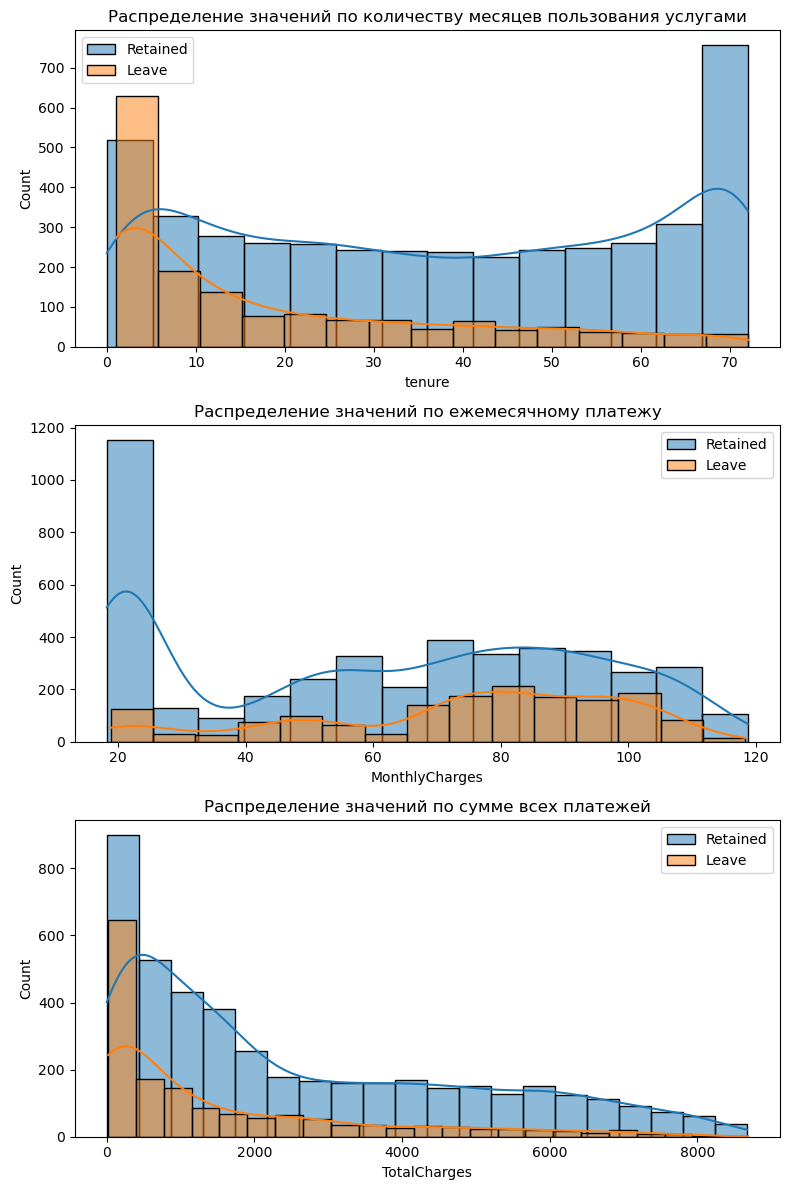

In [8]:
# Зададим количество окон графиков
fig, axes = plt.subplots(nrows=3, figsize=(8, 12))

# Постороение гистограммы распределения значений по кол-ву месяцев пользования клиентами услугами компании
sns.histplot(data_frame[data_frame['Churn'] == 'No']['tenure'], ax=axes[0], kde=True, label='Retained')
sns.histplot(data_frame[data_frame['Churn'] == 'Yes']['tenure'], ax=axes[0], kde=True, label='Leave')

# Постороение гистограммы распределения значений по ежемесячному платежу
sns.histplot(data_frame[data_frame['Churn'] == 'No']['MonthlyCharges'], ax=axes[1], kde=True, label='Retained')
sns.histplot(data_frame[data_frame['Churn'] == 'Yes']['MonthlyCharges'], ax=axes[1], kde=True, label='Leave')

# Постороение гистограммы распределения значений по сумме всех платежей за весь перод пользования услугами
sns.histplot(data_frame[data_frame['Churn'] == 'No']['TotalCharges'], ax=axes[2], kde=True, label='Retained')
sns.histplot(data_frame[data_frame['Churn'] == 'Yes']['TotalCharges'], ax=axes[2], kde=True, label='Leave')

# Отобразим легенду и зададим наименование графиков
axes[0].legend()
axes[0].set_title('Распределение значений по количеству месяцев пользования услугами')

axes[1].legend()
axes[1].set_title('Распределение значений по ежемесячному платежу')

axes[2].legend()
axes[2].set_title('Распределение значений по сумме всех платежей')

# Определим наилучшее расположение графиков и отоброжение
plt.tight_layout()
plt.show()

1. Рассматривая количество месяцев пользования услугами можно заметить, что чем дольше клиент пользуется услугами компании, тем больше вероятность, что он продолжит пользоватся услугами.

2. Рассмотрев распределеиние значений ежемесячных платежей, что клиенты с низким ежемесячным платежом (< 30 ед.) с большей вероятностью будет "удержан".

3. По последнему распределеию можно сказать, что чем больше платежей было внесено, тем больше вероятность, что клиент продолжит пользоватся услугами компании.

2.1.3 Иследование зависимости гендерной принадлежности и возрастной категории (является пенсионером или нет) клиентов в разрезе оттока.

In [9]:
# Сгрупперуем данные по оттоку и подсчитем кол-во значений по полу
genders_churn = data_frame.groupby(['Churn'], as_index=False)['gender'].value_counts()
genders_churn

,Churn,gender,count
0,No,Male,2254
1,No,Female,2145
2,Yes,Male,796
3,Yes,Female,791


In [10]:
# Сгрупперуем данные по оттоку и подсчитем кол-во значений по возрастному признаку
senior_churn = data_frame.groupby(['Churn'], as_index=False)['SeniorCitizen'].value_counts()
senior_churn['SeniorCitizen'] = senior_churn['SeniorCitizen'].apply(lambda x: 'Senior' if x == 1 else 'No Senior')
senior_churn

,Churn,SeniorCitizen,count
0,No,No Senior,3835
1,No,Senior,564
2,Yes,No Senior,1185
3,Yes,Senior,402


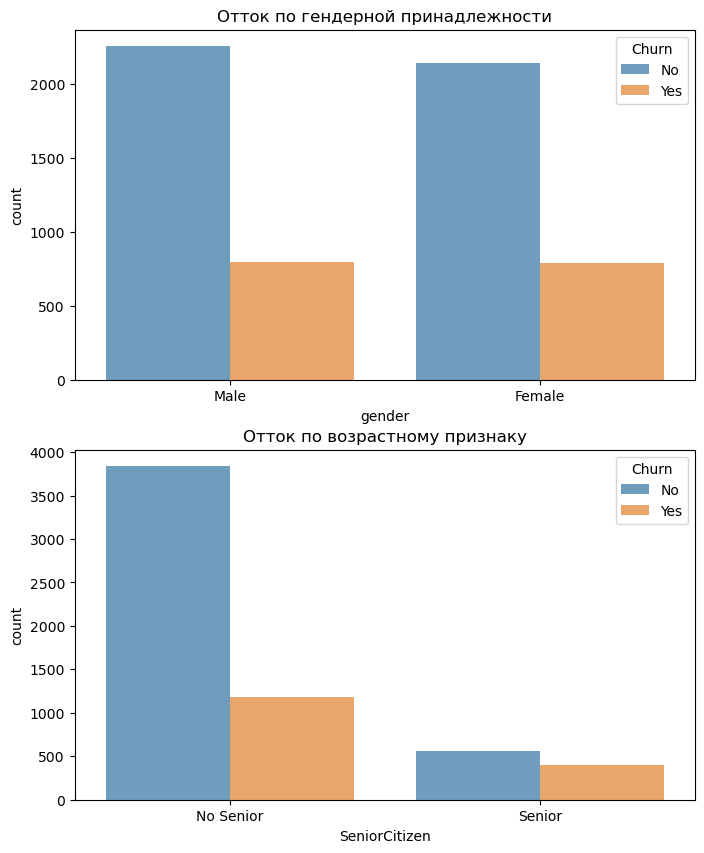

In [11]:
# Зададим количество окон графиков
fig, axes = plt.subplots(nrows=2, figsize=(8, 10))

# Построим столбчетую диаграмму по каждому сгрупперованному признаку
sns.barplot(data=genders_churn, x='gender', y='count', hue='Churn', alpha=0.7, ax=axes[0])
sns.barplot(data=senior_churn, x='SeniorCitizen', y='count', hue='Churn', alpha=0.7, ax=axes[1])

# Зададим наименование графикам
axes[0].set_title('Отток по гендерной принадлежности')
axes[1].set_title('Отток по возрастному признаку')

plt.show()

1. Рассмотрев гендерное влияние на отток клинетов компании можно заказть, что определенной зависимости от пола клиента нет.
2. При рассмотрении группу клиентов - пенсионеров, можно заметить, что около 20% клиентов являются пенсионерами и они чаще отказываются от услуг компании.

2.1.4 Иследование зависимости оттока от семейного положения и наличия иждивенцев

In [12]:
# Сгрупперуем данные по оттоку и посмотрим на распределение значений по признаку сеймейного положения клиента
partner_churn = data_frame.groupby(['Churn'], as_index=False)['Partner'].value_counts()
partner_churn

,Churn,Partner,count
0,No,Yes,2328
1,No,No,2071
2,Yes,No,1011
3,Yes,Yes,576


In [13]:
# Сгрупперуем данные по оттоку и посмотрим на признак наличия иждивенцев у клиента
dependents_churn = data_frame.groupby(['Churn'], as_index=False)['Dependents'].value_counts()
dependents_churn

,Churn,Dependents,count
0,No,No,2889
1,No,Yes,1510
2,Yes,No,1306
3,Yes,Yes,281


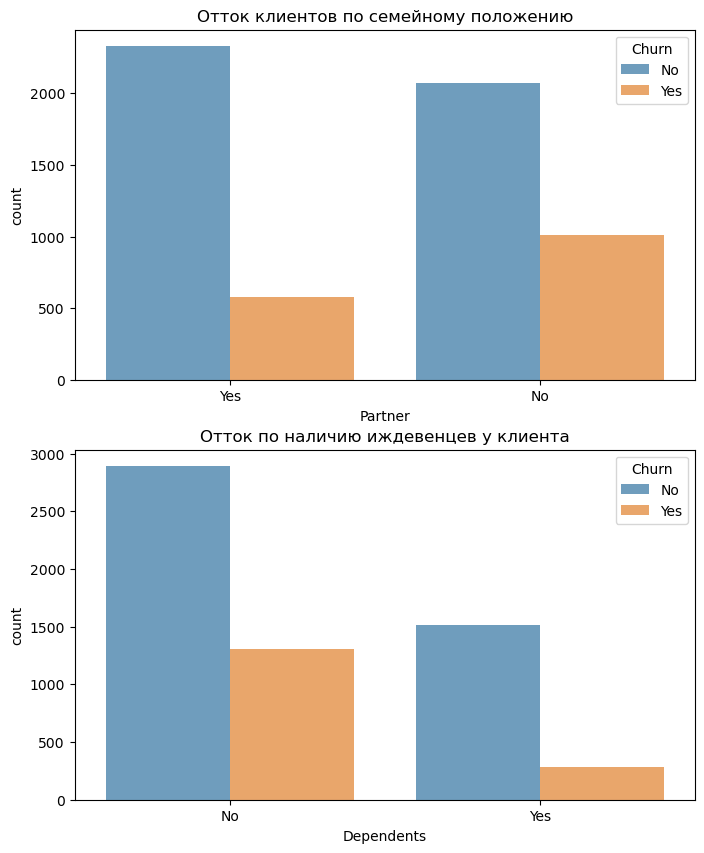

In [14]:
# Зададим количество окон графиков
fig, axes = plt.subplots(nrows=2, figsize=(8, 10))

# Построим столбчетую диаграмму по каждому сгрупперованному признаку
sns.barplot(data=partner_churn, x='Partner', y='count', hue='Churn', alpha=0.7, ax=axes[0])
sns.barplot(data=dependents_churn, x='Dependents', y='count', hue='Churn', alpha=0.7, ax=axes[1])

# Зададим наименование графикам
axes[0].set_title('Отток клиентов по семейному положению')
axes[1].set_title('Отток по наличию иждевенцев у клиента')

plt.show()

Из данного иследования можно заметить, что чаще всего отказываются от услуг клиенты неимеющие партнера и иждевенцов.

2.1.5 Иследование зависимости оттока от пользования услугами телефонии и интернетом

In [15]:
# Сгрупперуем данные по оттоку и пользованию услугами телефонии
phone_service_churn = data_frame.groupby(['Churn'], as_index=False)['PhoneService'].value_counts()
phone_service_churn

,Churn,PhoneService,count
0,No,Yes,3958
1,No,No,441
2,Yes,Yes,1438
3,Yes,No,149


In [16]:
# Сгрупперуем данные по оттоку и пользованию услугами интернета
internet_service_churn = data_frame.groupby(['Churn'], as_index=False)['InternetService'].value_counts()
internet_service_churn

,Churn,InternetService,count
0,No,DSL,1671
1,No,Fiber optic,1536
2,No,No,1192
3,Yes,Fiber optic,1091
4,Yes,DSL,397
5,Yes,No,99


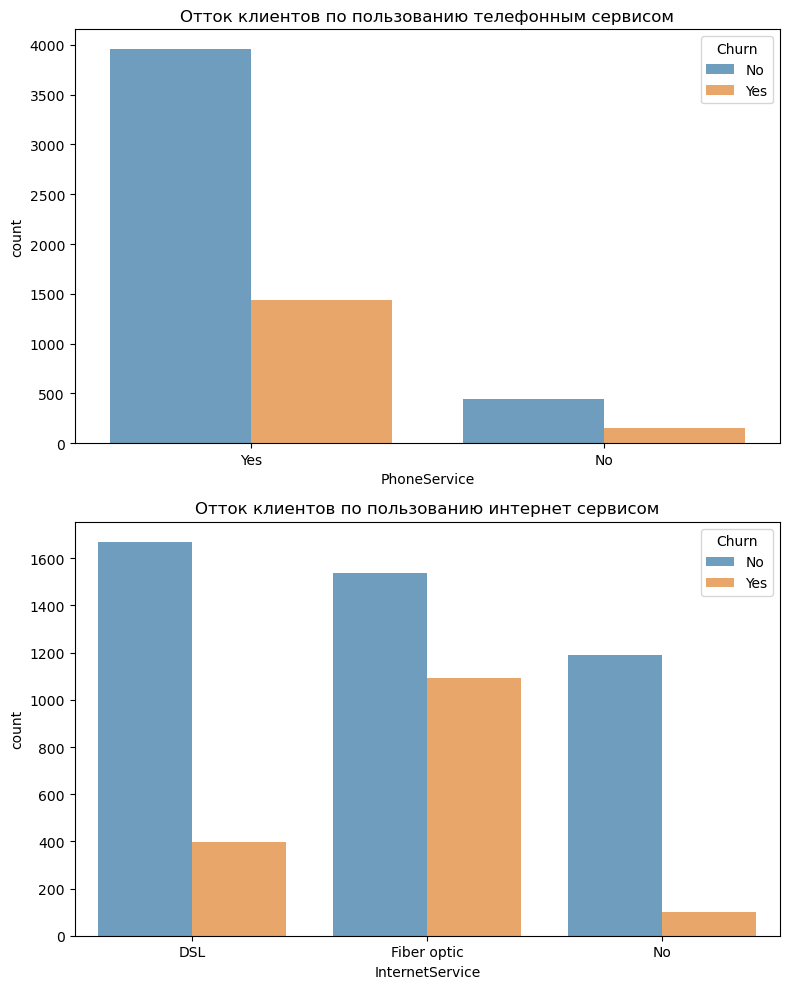

In [17]:
# Зададим количество окон графиков
fig, axes = plt.subplots(nrows=2, figsize=(8, 10))

# Построим столбчетую диаграмму по каждому сгрупперованному признаку
sns.barplot(data=phone_service_churn, x='PhoneService', y='count', hue='Churn', alpha=0.7, ax=axes[0])
sns.barplot(data=internet_service_churn, x='InternetService', y='count', hue='Churn', alpha=0.7, ax=axes[1])

# Зададим наименование графикам
axes[0].set_title('Отток клиентов по пользованию телефонным сервисом')
axes[1].set_title('Отток клиентов по пользованию интернет сервисом')

plt.tight_layout()
plt.show()

1. Рассмотрениие килентов которые пользуются услугами телефонии можно заметить, что большенство клиентов пользуется услугами телефонной связи. Данный показательно не является основной причиной оттока клиентоа, так как отток клиентов по данному направлению чуть больше 30%
2. При рассмотрении клинтов которые пользуются интернет сервисом, можно заметить, что большенство клиентов отказывается от дальнейшего сотудничества из-за оптоволоконной связи.

2.1.6 Иследование зависимости оттока клиентов от типа контракта, пользование услугай безбумажного билинга и метаду оплаты услуг

In [18]:
# Сгрупперуем данные по оттоку и типу контракта клинта
contract_churn = data_frame.groupby(['Churn'], as_index=False)['Contract'].value_counts()
contract_churn

,Churn,Contract,count
0,No,Month-to-month,1871
1,No,Two year,1400
2,No,One year,1128
3,Yes,Month-to-month,1398
4,Yes,One year,148
5,Yes,Two year,41


In [19]:
# Сгрупперуем данные по оттоку и пользования клиентом безбумажным билингом 
billing_churn = data_frame.groupby(['Churn'], as_index=False)['PaperlessBilling'].value_counts()
billing_churn

,Churn,PaperlessBilling,count
0,No,Yes,2347
1,No,No,2052
2,Yes,Yes,1181
3,Yes,No,406


In [20]:
# Сгрупперуем данные по оттоку и методу оплаты
payment_method_churn = data_frame.groupby(['Churn'], as_index=False)['PaymentMethod'].value_counts()
payment_method_churn

,Churn,PaymentMethod,count
0,No,Mailed check,1106
1,No,Credit card (automatic),1105
2,No,Electronic check,1104
3,No,Bank transfer (automatic),1084
4,Yes,Electronic check,902
5,Yes,Mailed check,263
6,Yes,Bank transfer (automatic),224
7,Yes,Credit card (automatic),198


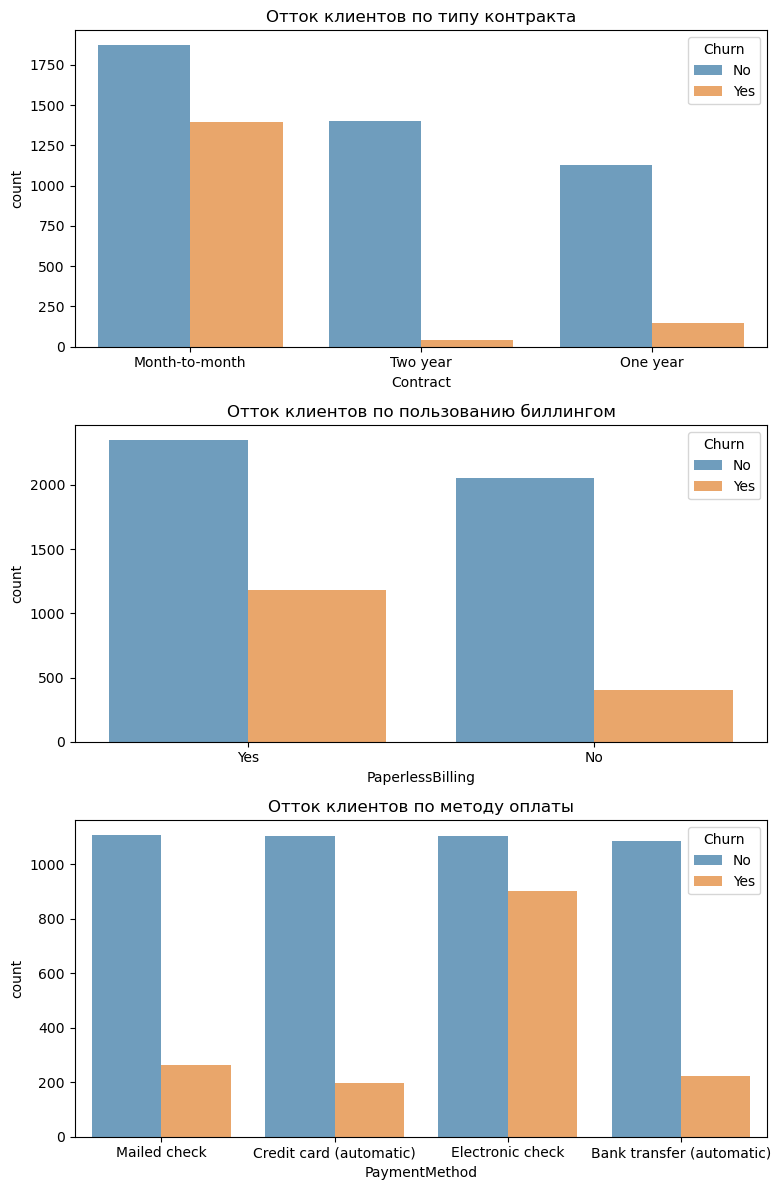

In [21]:
# Зададим количество окон графиков
fig, axes = plt.subplots(nrows=3, figsize=(8, 12))

# Постороение гистограммы распределения значений по кол-ву месяцев пользования клиентами услугами компании
sns.barplot(data=contract_churn, x='Contract', y='count', hue='Churn', alpha=0.7, ax=axes[0])
sns.barplot(data=billing_churn, x='PaperlessBilling', y='count', hue='Churn', alpha=0.7, ax=axes[1])
sns.barplot(data=payment_method_churn, x='PaymentMethod', y='count', hue='Churn', alpha=0.7, ax=axes[2])

# Отобразим легенду и зададим наименование графиков
axes[0].set_title('Отток клиентов по типу контракта')
axes[1].set_title('Отток клиентов по пользованию биллингом')
axes[2].set_title('Отток клиентов по методу оплаты')

# Определим наилучшее расположение графиков и отоброжение
plt.tight_layout()
plt.show()

Из этих данных можно предположить, что клиенты с контрактами на более долгий срок и оплачивающие услуги через банковский перевод или кредитную карту, менее склонны к уходу.

#### Формирование гипотезы:

Так как рассматриваются данные телекомуникационной компании, самыми очевидными показателсями ухода клиентов является стоимость и качество предоставляемых услуг, что подтверждается выводами проделанного анализа, также можно добавить возрастной признак и тип заключенного контракта. В соответсвии с этим для построения предиктовой модели ухода клиентов сделаем предположение, что на уход клиентов влияют следующие признаки:

1. Продолжительность пользования услугами компании
2. Ежемесячный платеж клиента
3. Общая сумма платежей, внесенных клиентом за весь период
4. Возраст клиента
5. Пользование услугой телефонии
6. Пользование услугой интернета
7. Тип контракта

Преобразуем данные к более подходящему виду используя MinMaxScaler преобразования для для следующих признаков:

1. Продолжительность пользования услугами компании (tenure)
2. Ежемесячный платеж клиента (MonthlyCharges)
3. Общая сумма платежей, внесенных клиентом за весь период (TotalCharges)

Разделим признак пользования интернет сервисом (InternetService) на отдельные признаки DSL, Fider optic и No. Тоже сделаем с признаком типа контракта (Contract) разделив на Month-to-month, Two year и One year.

Все остальные признаки приведем к бинарному типу и построим корреляционную матрицу.

In [22]:
### Копирование основного набора данных
copy_df = data_frame.copy()

# Список для удаления столбцов
drop_list = ['customerID', 'gender', 'Partner', 'Dependents', 'MultipleLines',
             'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
             'StreamingTV', 'StreamingMovies', 'PaperlessBilling', 'PaymentMethod']

# Удаление столбцов
copy_df.drop(columns=drop_list, inplace=True)
copy_df

,SeniorCitizen,tenure,PhoneService,InternetService,Contract,MonthlyCharges,TotalCharges,Churn
1869,0,72,Yes,No,Two year,24.10,1734.65,No
4528,0,44,Yes,Fiber optic,Month-to-month,88.15,3973.20,No
6344,1,38,Yes,Fiber optic,Month-to-month,74.95,2869.85,Yes
6739,0,4,Yes,DSL,Month-to-month,55.90,238.50,No
432,0,2,Yes,DSL,Month-to-month,53.45,119.50,No
...,...,...,...,...,...,...,...,...
3772,0,1,Yes,Fiber optic,Month-to-month,95.00,95.00,Yes
5191,0,23,Yes,DSL,Two year,91.10,2198.30,No
5226,0,12,Yes,No,Month-to-month,21.15,306.05,No
5390,1,12,Yes,Fiber optic,Month-to-month,99.45,1200.15,Yes


In [23]:
# Обявление преобразования MinMaxScaler
scaler = MinMaxScaler()

# Применение преобразования MinMaxScaler к признакам tenure, MonthlyCharges и TotalCharges
copy_df['tenure'] = scaler.fit_transform(copy_df['tenure'].values.reshape(-1, 1))
copy_df['MonthlyCharges'] = scaler.fit_transform(copy_df['MonthlyCharges'].values.reshape(-1, 1))
copy_df['TotalCharges'] = scaler.fit_transform(copy_df['TotalCharges'].values.reshape(-1, 1))

# Преобразование к бинарному типу признаков PhoneService и Churn
copy_df['PhoneService'] = copy_df['PhoneService'].map({'No': 0, 'Yes': 1}).astype('int64')
copy_df['Churn'] = copy_df['Churn'].map({'No': 0, 'Yes': 1}).astype('int64')

# Разделение признаков Contract и InternetService
contract_dummies = pd.get_dummies(copy_df['Contract'], prefix='Contract')
internet_service_dummies = pd.get_dummies(copy_df['InternetService'], prefix='InternetService')

# Объединение датасета и новых признаков
copy_df = pd.concat([copy_df, contract_dummies, internet_service_dummies], axis=1)

# Удаление лишних столбцов
copy_df.drop(['Contract', 'InternetService'], axis=1, inplace=True)

# Приведение к одному типу данных
copy_df['Contract_Two year'] = copy_df['Contract_Two year'].astype('int64')
copy_df['Contract_One year'] = copy_df['Contract_One year'].astype('int64')
copy_df['Contract_Month-to-month'] = copy_df['Contract_Month-to-month'].astype('int64')
copy_df['InternetService_DSL'] = copy_df['InternetService_DSL'].astype('int64')
copy_df['InternetService_Fiber optic'] = copy_df['InternetService_Fiber optic'].astype('int64')
copy_df['InternetService_No'] = copy_df['InternetService_No'].astype('int64')

copy_df

,SeniorCitizen,tenure,PhoneService,MonthlyCharges,TotalCharges,Churn,Contract_Month-to-month,Contract_One year,Contract_Two year,InternetService_DSL,InternetService_Fiber optic,InternetService_No
1869,0,1.000000,1,0.058209,0.199734,0,0,0,1,0,0,1
4528,0,0.611111,1,0.695522,0.457489,0,1,0,0,0,1,0
6344,1,0.527778,1,0.564179,0.330445,1,1,0,0,0,1,0
6739,0,0.055556,1,0.374627,0.027462,0,1,0,0,1,0,0
432,0,0.027778,1,0.350249,0.013760,0,1,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
3772,0,0.013889,1,0.763682,0.010939,1,1,0,0,0,1,0
5191,0,0.319444,1,0.724876,0.253120,0,0,0,1,1,0,0
5226,0,0.166667,1,0.028856,0.035240,0,1,0,0,0,0,1
5390,1,0.166667,1,0.807960,0.138190,1,1,0,0,0,1,0


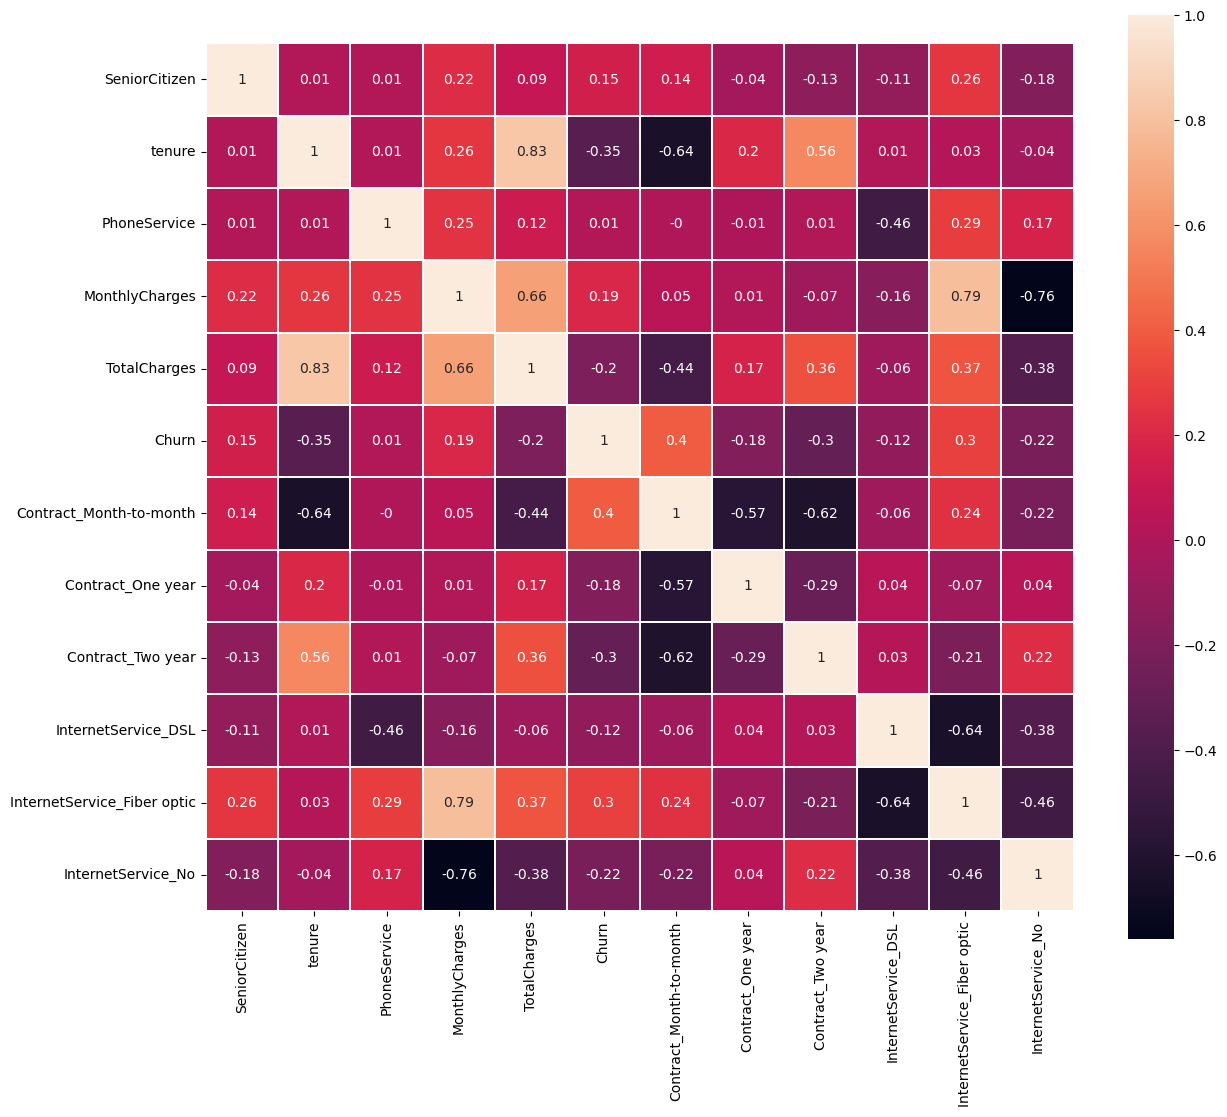

In [24]:
# Построеине корреляционной матрицы
plt.figure(figsize=(14, 12))
sns.heatmap(round(copy_df.corr(), 2), linecolor='white', 
            annot=True, square=True, 
            linewidths=0.1, vmax=1.0)
plt.show()

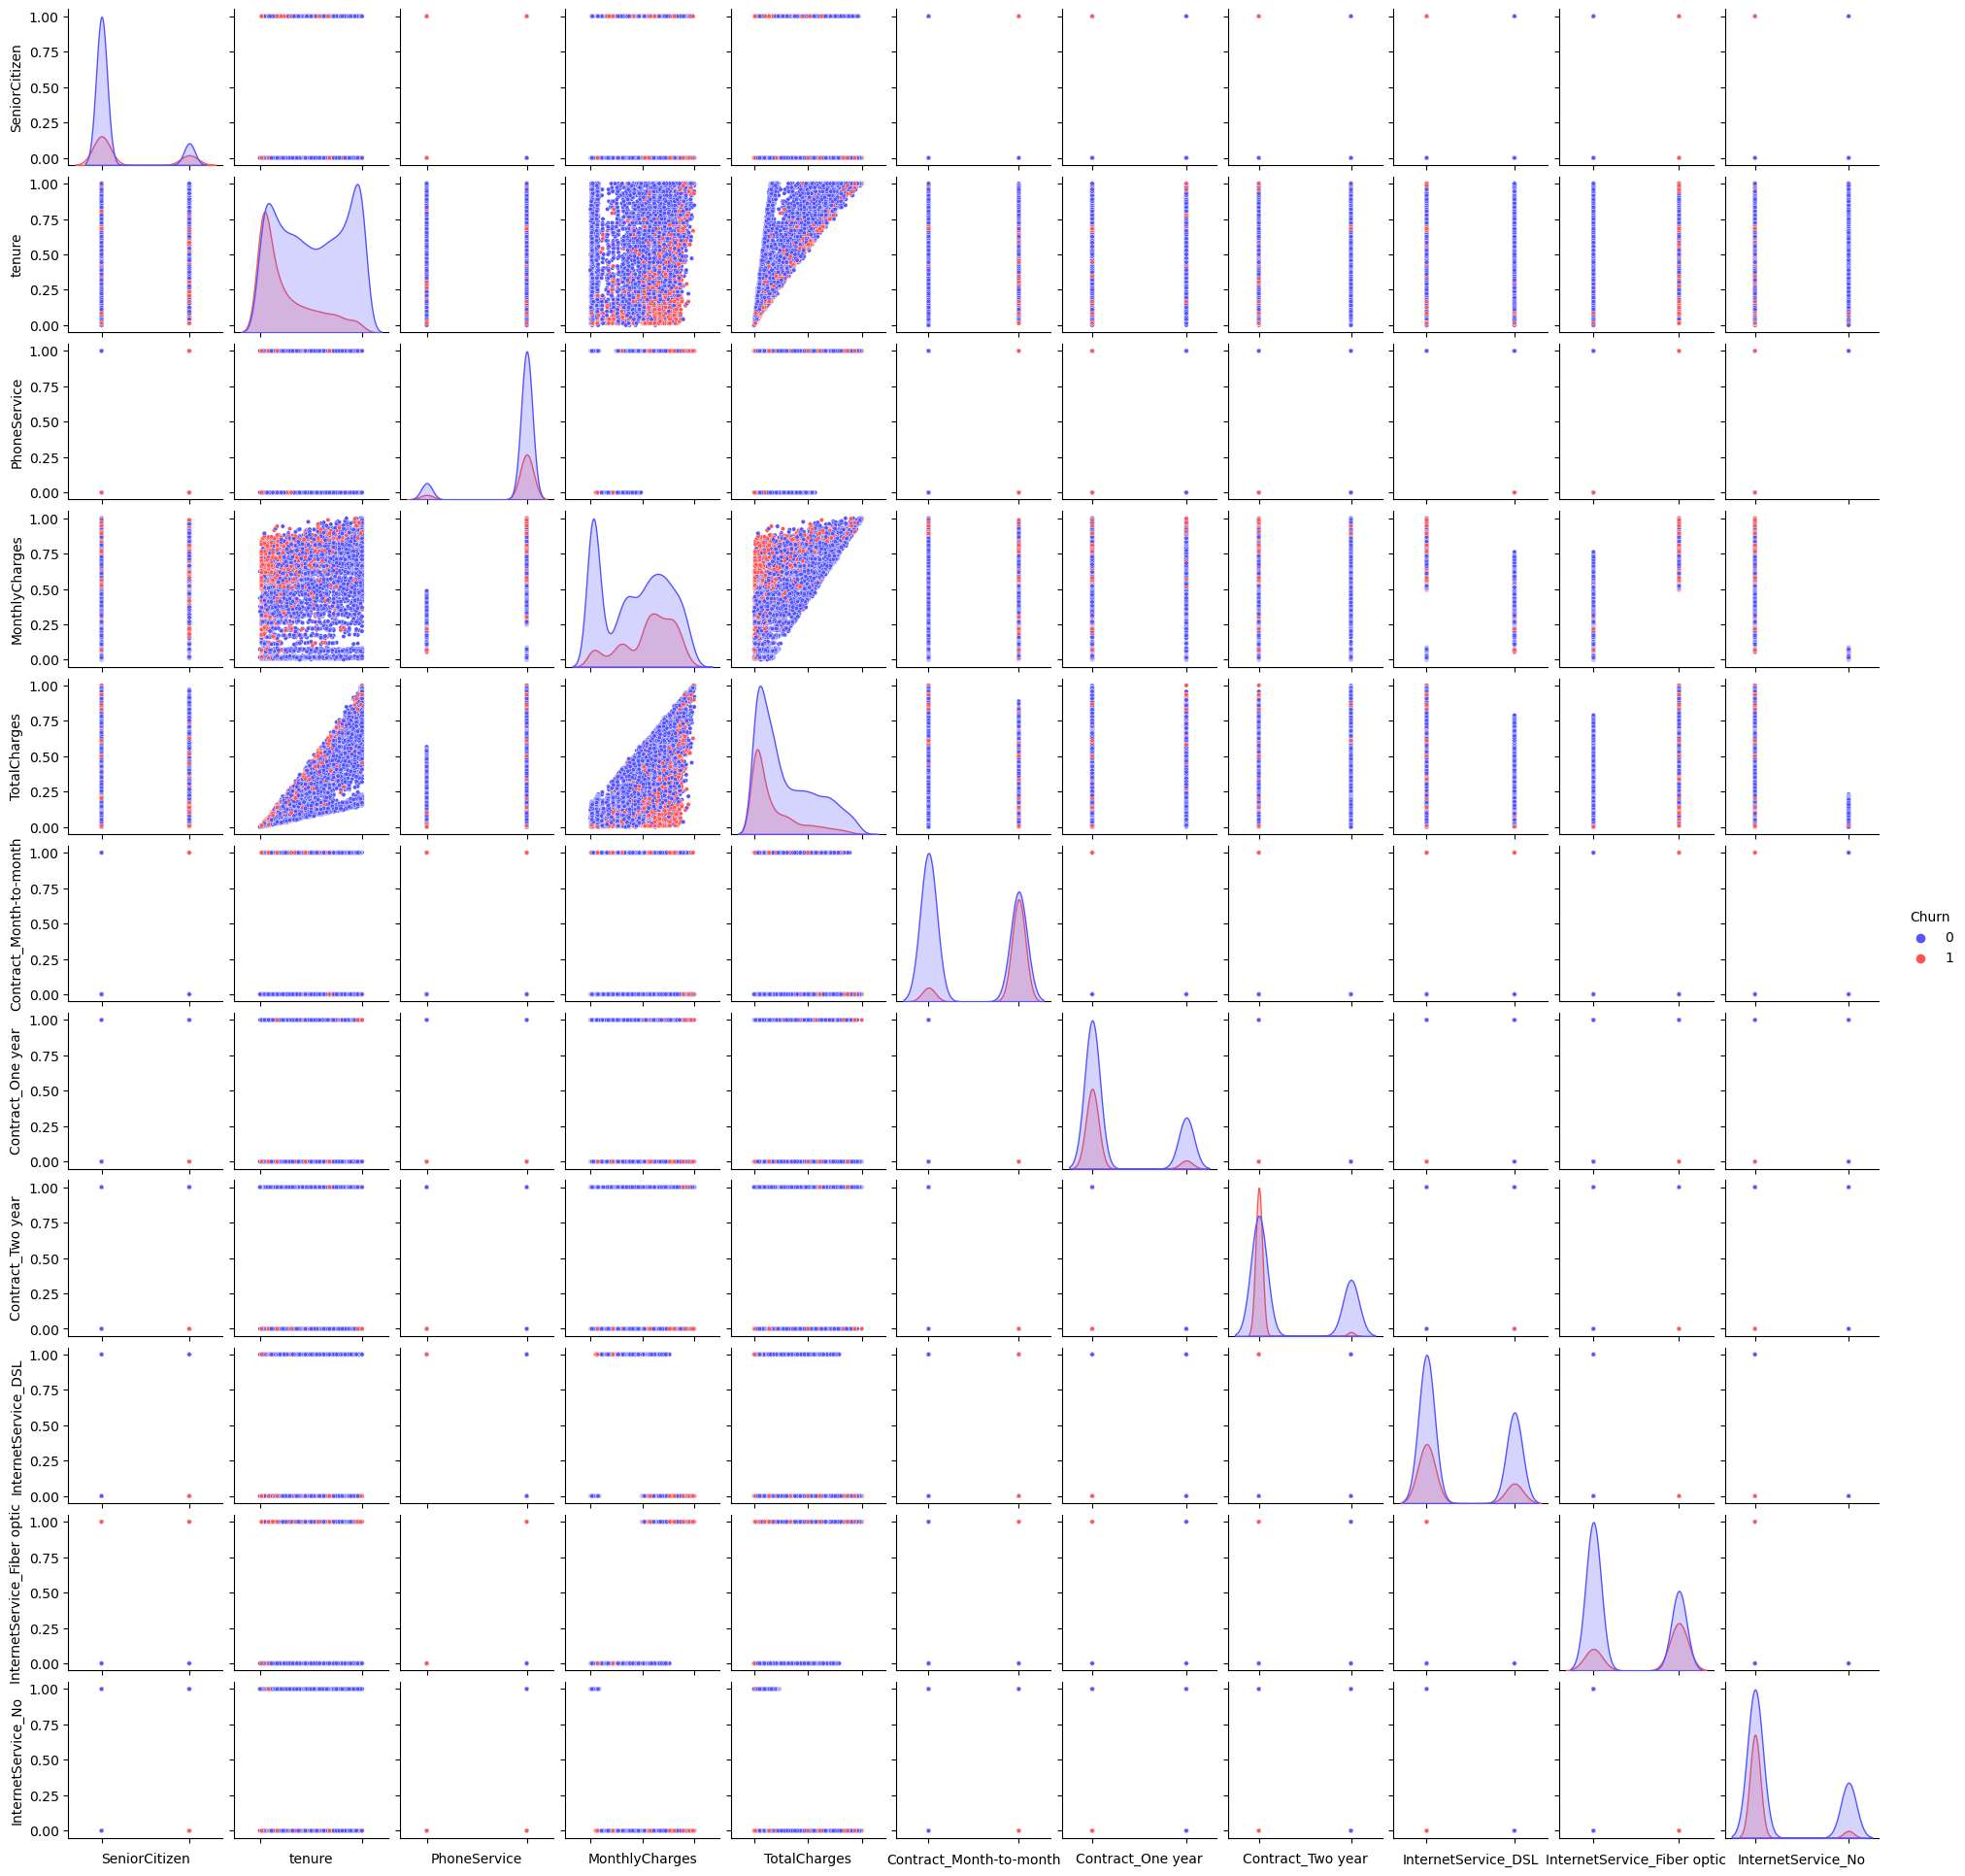

In [25]:
g = sns.pairplot(copy_df[['SeniorCitizen', 'tenure', 'PhoneService', 'MonthlyCharges',
                          'TotalCharges', 'Churn', 'Contract_Month-to-month', 'Contract_One year',
                          'Contract_Two year', 'InternetService_DSL',
                          'InternetService_Fiber optic', 'InternetService_No']], 
                 hue='Churn', palette = 'seismic', height=1.8, plot_kws=dict(s=10))
g.set(xticklabels=[])
plt.show()

# 3. Построение моделей для прогнозирования оттока

Прогнозирование оттока клиентов в телекоммуникационной компании - это задача бинарной классификации, где мы пытаемся предсказать, уйдет ли клиент (класс 1) или останется (класс 0) в компании. Для решения этой задачи, мы можем использовать различные модели классификации, такие как логистическая регрессия, случайный лес, градиентный бустинг и SVM. Далее мы подберем параметры для каждой модели при помощи кросс валидации, проведем обучение модели на лучших параметрах и построим матрицу ошибок с выводом небольшого отчета по каждому классификтору.

3.1 Построение модели логистической регрессии

In [26]:
def cross_validate_models(model, X, y, param_grid, cv=5, scoring=None):
    """
    Оптимизирует гиперпараметры для заданной модели.

    Parameters:
    - model: Экземпляр модели.
    - X: Матрица признаков.
    - y: Вектор целевых значений.
    - param_grid: Словарь параметров и их значений для оптимизации.
    - cv: Количество фолдов для кросс-валидации.

    Returns:
    - best_model: Модель с наилучшими гиперпараметрами.
    """
    
    grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=cv, scoring=scoring, n_jobs= -1)
    grid_search.fit(X, y)
    best_model = grid_search.best_params_
    return print('Лучшие параметры для классификатора\n{}'.format(best_model))

In [27]:
def plot_confusion_matrix(model, X_test, y_test, labels=None):
    """
    Построение Confusion Matrix для заданной модели.

    Parameters:
    - model: Экземпляр обученной модели.
    - X_test: Тестовая выборка признаков.
    - y_test: Вектор целевых значений для тестовой выборки.
    - labels: Список меток классов (необязательно).

    Returns:
    - Выводит матрицу ошибок.
    """
    
    y_pred = model.predict(X_test)
    cm = confusion_matrix(y_test, y_pred)

    if labels is None:
        labels = np.unique(y_test)

    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=labels, yticklabels=labels)
    plt.xlabel('Предсказанные значения')
    plt.ylabel('Действительное значения')
    plt.title('Матрица ошибок')
    plt.show()
    
    print(classification_report(y_test, y_pred))

In [31]:
# Матрица признаков
X = copy_df.drop(labels=['Churn'], axis=1)
# Вектор целевых значений
y = copy_df['Churn']


skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Разбиение признаков и целевых значений на тренировочный и тестовый набор
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

In [32]:
logistic_regression = LogisticRegression(random_state=42)

param_grid = {
    'penalty': ['l1', 'l2', 'elasticnet'],
    'C': np.arange(0.01, 1, 0.01),
    'solver': ['liblinear', 'saga'],
    'class_weight' : [None, 'balanced'],
    'fit_intercept' : [False, True],
    'max_iter': [100, 200, 500]
}

cross_validate_models(logistic_regression, X_train, y_train, param_grid=param_grid, cv=skf, scoring='roc_auc')

Лучшие параметры для классификатора
{'C': 0.99, 'class_weight': None, 'fit_intercept': False, 'max_iter': 100, 'penalty': 'l1', 'solver': 'saga'}


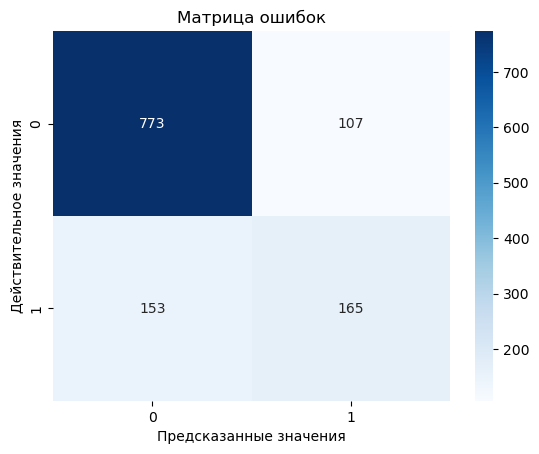

              precision    recall  f1-score   support

           0       0.83      0.88      0.86       880
           1       0.61      0.52      0.56       318

    accuracy                           0.78      1198
   macro avg       0.72      0.70      0.71      1198
weighted avg       0.77      0.78      0.78      1198



In [33]:
logistic_regression = LogisticRegression(
    C=0.99, 
    class_weight=None,
    penalty='l1',
    random_state=42, 
    solver='saga', 
    fit_intercept=False,
    max_iter=100
)

logistic_regression.fit(X_train, y_train)

plot_confusion_matrix(model=logistic_regression, X_test=X_test, y_test=y_test)

3.2 Построение модели случайного леса

In [34]:
# Создание модели случайного леса
rf_classifier = RandomForestClassifier(random_state=42)

# Определение сетки гиперпараметров для настройки
param_grid = {
    'n_estimators': range(10, 100, 10),
    'min_samples_leaf': range(1, 5),
    'max_depth': [None, 10, 20],
    'min_samples_split': range(1, 5),
    'class_weight' : [None, 'balanced'],
    'criterion' : ['gini', 'entropy', 'log_loss'],
    'max_features': [None, 'sqrt', 'log2']
}

cross_validate_models(rf_classifier, X=X_train, y=y_train, param_grid=param_grid, cv=skf, scoring='roc_auc')

Лучшие параметры для классификатора
{'class_weight': 'balanced', 'criterion': 'entropy', 'max_depth': 10, 'max_features': 'sqrt', 'min_samples_leaf': 4, 'min_samples_split': 2, 'n_estimators': 80}


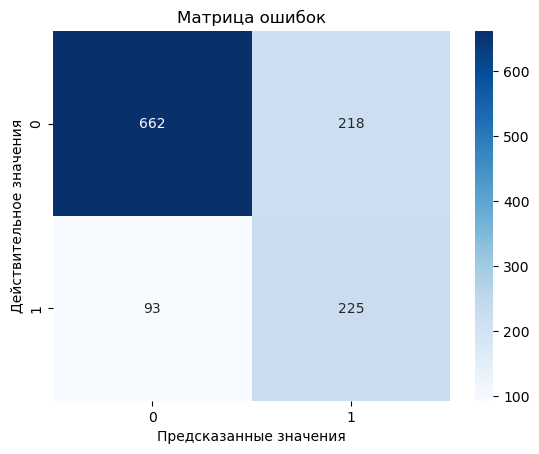

              precision    recall  f1-score   support

           0       0.88      0.75      0.81       880
           1       0.51      0.71      0.59       318

    accuracy                           0.74      1198
   macro avg       0.69      0.73      0.70      1198
weighted avg       0.78      0.74      0.75      1198



In [35]:
rf_classifier = RandomForestClassifier(
    class_weight='balanced', 
    max_depth=10, 
    n_estimators=80,
    random_state=42,
    criterion='entropy',
    min_samples_leaf=4,
    min_samples_split=2,
    max_features='sqrt'
)

rf_classifier.fit(X_train, y_train)

plot_confusion_matrix(model=rf_classifier, X_test=X_test, y_test=y_test)

3.3 Построение модели SVM

In [36]:
# Определите модель SVM
svm = SVC(random_state=42)

# Определите параметры, которые вы хотите оптимизировать
param_grid = {
    'C': np.arange(0.01, 1, 0.01),
    'kernel': ['linear', 'poly', 'rbf'],
    'gamma': ['scale', 'auto'],
    'decision_function_shape' : ['ovo', 'ovr'],
    'class_weight': [None, 'balanced']
}

cross_validate_models(model=svm, X=X_train, y=y_train, param_grid=param_grid, cv=skf, scoring='roc_auc')

Лучшие параметры для классификатора
{'C': 0.01, 'class_weight': 'balanced', 'decision_function_shape': 'ovo', 'gamma': 'scale', 'kernel': 'linear'}


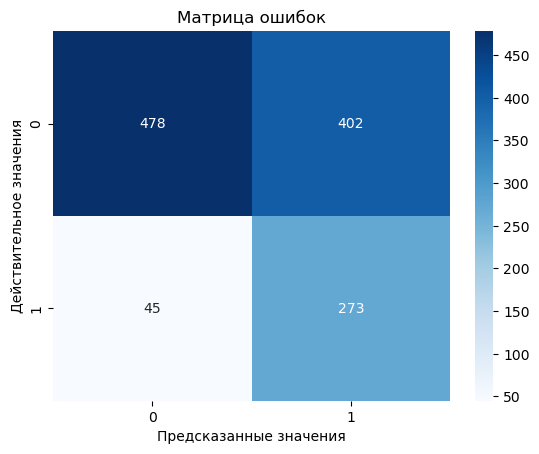

              precision    recall  f1-score   support

           0       0.91      0.54      0.68       880
           1       0.40      0.86      0.55       318

    accuracy                           0.63      1198
   macro avg       0.66      0.70      0.62      1198
weighted avg       0.78      0.63      0.65      1198



In [37]:
svm = SVC(
    C=0.01, 
    class_weight='balanced', 
    gamma='scale', 
    decision_function_shape='ovo',
    kernel='linear',
    random_state=42,
    probability=True
)

svm.fit(X_train, y_train)

plot_confusion_matrix(model=svm, X_test=X_test, y_test=y_test)

3.4 Построение модели градиентного бустинга

In [38]:
# Определите модель XGBoost
xgb_model = xgb.XGBClassifier()

# Определите параметры, которые вы хотите оптимизировать
param_grid = {
    'n_estimators': [100, 200, 300],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 4, 5],
    'subsample': [0.8, 0.9, 1.0],
    'colsample_bytree': [0.8, 0.9, 1.0]
}

cross_validate_models(model=xgb_model, X=X_train, y=y_train, param_grid=param_grid, cv=skf)

Лучшие параметры для классификатора
{'colsample_bytree': 0.9, 'learning_rate': 0.01, 'max_depth': 4, 'n_estimators': 300, 'subsample': 0.9}


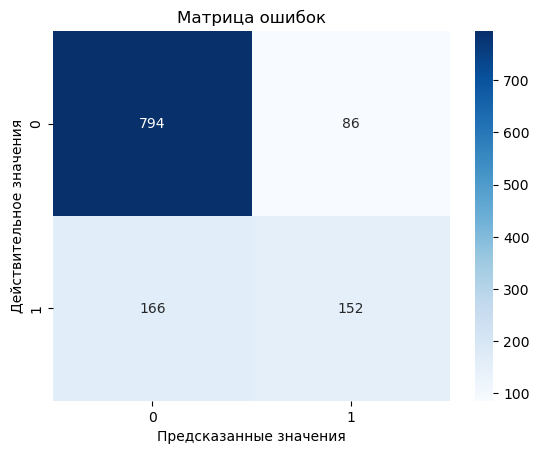

              precision    recall  f1-score   support

           0       0.83      0.90      0.86       880
           1       0.64      0.48      0.55       318

    accuracy                           0.79      1198
   macro avg       0.73      0.69      0.70      1198
weighted avg       0.78      0.79      0.78      1198



In [39]:
xgb_model = xgb.XGBClassifier(
    colsample_bytree=0.9,
    learning_rate=0.01,
    max_depth=4,
    n_estimators=300,
    subsample=0.9
)

xgb_model.fit(X_train, y_train)

plot_confusion_matrix(model=xgb_model, X_test=X_test, y_test=y_test)

# 4. Сравнение качества моделей

In [40]:
def evaluate_models(all_models, X_train, y_train, X_test, y_test):
    
    models = all_models

    # Инициализируйте списки для хранения метрик и имен моделей
    metrics_dict = {
        "Model": [],
        "ROC AUC": [],
        "Accuracy": [],
        "Precision": [],
        "Recall": [],
        "F1 Score": []
    }
    
    plt.figure(figsize=(8, 6))
    for model_name, model in models:
        
        # Обучите модель на обучающей выборке
        model.fit(X_train, y_train)

        # Получите вероятности положительного класса для вычисления ROC AUC
        y_prob = model.predict_proba(X_test)[:, 1]

        # Вычислите метрики
        roc_auc = roc_auc_score(y_test, y_prob)
        accuracy = accuracy_score(y_test, model.predict(X_test))
        precision = precision_score(y_test, model.predict(X_test))
        recall = recall_score(y_test, model.predict(X_test))
        f1 = f1_score(y_test, model.predict(X_test))

        # Добавьте результаты в словарь
        metrics_dict["Model"].append(model_name)
        metrics_dict["ROC AUC"].append(roc_auc)
        metrics_dict["Accuracy"].append(accuracy)
        metrics_dict["Precision"].append(precision)
        metrics_dict["Recall"].append(recall)
        metrics_dict["F1 Score"].append(f1)

        # Выведите ROC кривую для текущей модели
        fpr, tpr, _ = roc_curve(y_test, y_prob)
        plt.plot(fpr, tpr, label=f'{model_name} (AUC = {roc_auc:.2f})')

    # Отобразите ROC кривые для всех моделей на одном графике
    plt.plot([0, 1], [0, 1], 'k--', label="Random")
    plt.xlabel("False Positive Rate")
    plt.ylabel("True Positive Rate")
    plt.title("ROC Curve")
    plt.legend(loc="lower right")
    plt.show()

    # Выведите метрики для каждой модели
    for i in range(len(models)):
        print(f"Model: {metrics_dict['Model'][i]}")
        print(f"ROC AUC: {metrics_dict['ROC AUC'][i]:.2f}")
        print(f"Accuracy: {metrics_dict['Accuracy'][i]:.2f}")
        print(f"Precision: {metrics_dict['Precision'][i]:.2f}")
        print(f"Recall: {metrics_dict['Recall'][i]:.2f}")
        print(f"F1 Score: {metrics_dict['F1 Score'][i]:.2f}")
        print("="*50)

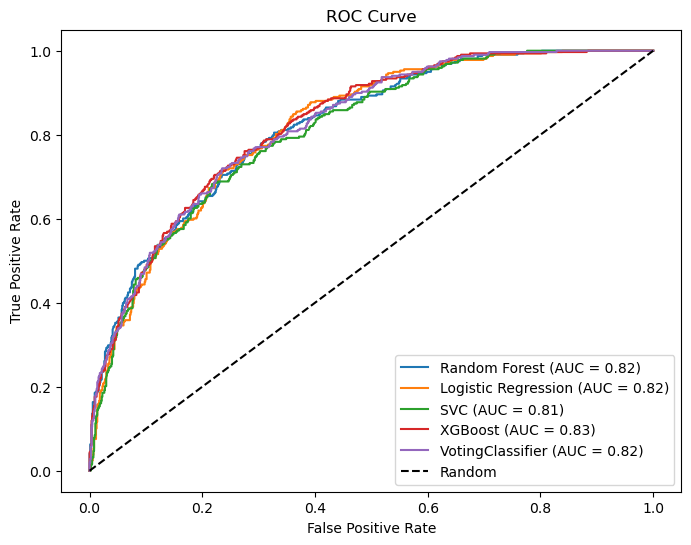

Model: Random Forest
ROC AUC: 0.82
Accuracy: 0.74
Precision: 0.51
Recall: 0.71
F1 Score: 0.59
Model: Logistic Regression
ROC AUC: 0.82
Accuracy: 0.78
Precision: 0.61
Recall: 0.52
F1 Score: 0.56
Model: SVC
ROC AUC: 0.81
Accuracy: 0.63
Precision: 0.40
Recall: 0.86
F1 Score: 0.55
Model: XGBoost
ROC AUC: 0.83
Accuracy: 0.79
Precision: 0.64
Recall: 0.48
F1 Score: 0.55
Model: VotingClassifier
ROC AUC: 0.82
Accuracy: 0.78
Precision: 0.58
Recall: 0.61
F1 Score: 0.59


In [72]:
models = [
        ("Random Forest", rf_classifier),
        ("Logistic Regression", logistic_regression),
        ("SVC", svm),
        ("XGBoost", xgb_model),
        ('VotingClassifier', final_ensemble)
]

evaluate_models(all_models=models, X_train=X_train, y_train=y_train, X_test=X_test, y_test=y_test)

Исходя из выводов метрик для разных моделей, можно сделать следующие выводы:

Random Forest:
Эта модель имеет хороший ROC AUC и точность, но полнота ниже, что может означать, что она склонна к ложным отрицательным прогнозам (много случаев ухода клиентов остается незамеченными).

Logistic Regression:
Модель логистической регрессии имеет высокую полноту (Recall), но низкую точность (Precision), что может привести к большему числу ложных положительных прогнозов.

SVC (Support Vector Classifier):
Модель SVC также имеет высокую полноту, но низкую точность, и при этом ниже Accuracy, что может быть следствием несбалансированности классов.

XGBoost:
Модель XGBoost показывает хорошую точность и ROC AUC, но, как и у других моделей, полнота ниже.

Общий вывод: Каждая модель имеет свои преимущества и недостатки. Выбор оптимальной модели будет зависеть от бизнес-целей. Например, если важно минимизировать ложные отрицательные прогнозы (пропущенные случаи ухода клиентов), то модель с более высокой полнотой, как логистическая регрессия или SVC, может быть предпочтительней. Если важна более высокая точность, то XGBoost может быть хорошим выбором.

In [70]:
xgb_model = xgb.XGBClassifier(
    colsample_bytree=0.9,
    learning_rate=0.01,
    max_depth=4,
    n_estimators=300,
    subsample=0.9)

xgb_model.fit(X_train, y_train)

# Получите вероятности классов (класс 1) для тестовой выборки
y_prob = xgb_model.predict_proba(X_test)[:, 1]

# Задаем порог вероятности
threshold = 0.45

# Преобразуем вероятности в бинарные предсказания на основе порога
y_pred = (y_prob > threshold).astype(int)

# Оценка производительность модели с новым порогом
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_pred)

# Выведите метрики
print(f"Accuracy: {accuracy:.2f}")
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1 Score: {f1:.2f}")
print(f"ROC AUC: {roc_auc:.2f}")

Accuracy: 0.78
Precision: 0.59
Recall: 0.57
F1 Score: 0.58
ROC AUC: 0.71


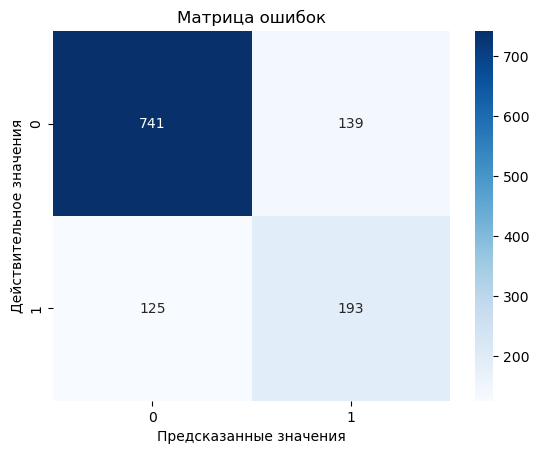

              precision    recall  f1-score   support

           0       0.86      0.84      0.85       880
           1       0.58      0.61      0.59       318

    accuracy                           0.78      1198
   macro avg       0.72      0.72      0.72      1198
weighted avg       0.78      0.78      0.78      1198



In [71]:
from sklearn.ensemble import VotingClassifier

# Создайте ансамбли моделей (внутренние ансамбли)
ensemble_1 = VotingClassifier(estimators=[
    ('Random Forest', rf_classifier),
    ('Logistic Regression', logistic_regression),
    ('SVC', svm),
    ('XGBoost', xgb_model)
], voting='soft')

ensemble_2 = VotingClassifier(estimators=[
    ('Random Forest', rf_classifier),
    ('Logistic Regression', logistic_regression),
    ('SVC', svm),
    ('XGBoost', xgb_model)
], voting='soft')

ensemble_3 = VotingClassifier(estimators=[
    ('Random Forest', rf_classifier),
    ('Logistic Regression', logistic_regression),
    ('SVC', svm),
    ('XGBoost', xgb_model)
], voting='soft')

# Создайте ансамбль ансамблей (внешний ансамбль)
final_ensemble = VotingClassifier(estimators=[
    ('Ensemble 1', ensemble_1),
    ('Ensemble 2', ensemble_2),
    ('Ensemble 3', ensemble_3)
], voting='soft')

# Обучите внешний ансамбль на обучающей выборке
final_ensemble.fit(X_train, y_train)

# Сделайте предсказания с использованием внешнего ансамбля
y_pred_final = final_ensemble.predict(X_test)

plot_confusion_matrix(model=final_ensemble, X_test=X_test, y_test=y_test)